# Analyzing Crimes in Los Angeles
### Datacamp project

Los Angeles, California. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

### Website: [Datacamp](https://www.datacamp.com/projects/1876)
### Credits to: George Boorman

________________________________________________________________________________________________________________________________________________________________________________

## Metadata

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## The task

The LAPD has asked you to help them by finding answers to the following questions:

- Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
- Identify the number of crimes committed against victims by age group (<18, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://tactsquad.com/wp-content/uploads/2021/08/LAPD-BANNER-WEB-1200x409.jpg")

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None

In [298]:
# Importing Data

filepath="crimes.csv"
df=pd.read_csv(filepath,delimiter=(","),parse_dates=["Date Rptd","DATE OCC"],dtype={"TIME OCC":str})

### 1. Exploring Data

In [299]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [300]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'247988 Rows by 12 Columns'

### 2. Cleaning up the Data!

In [301]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
...,...,...,...,...,...,...,...,...,...,...,...,...
247983,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
247984,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
247985,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
247986,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


In [302]:
df.rename(columns=str.lower,inplace=True)
df.sample()


,dr_no,date rptd,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,weapon desc,status desc,location
115741,221811805,2022-06-01,2022-06-01,0740,Southeast,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",45,M,H,OTHER KNIFE,Invest Cont,800 W 104TH PL


In [303]:
df.columns=df.columns.str.replace(" ","_")
df.sample()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
34062,222112111,2022-07-25,2022-07-24,1730,Topanga,VEHICLE - STOLEN,0,NaN,NaN,NaN,Invest Cont,21500 ROSCOE BL


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dr_no         247988 non-null  int64         
 1   date_rptd     247988 non-null  datetime64[ns]
 2   date_occ      247988 non-null  datetime64[ns]
 3   time_occ      247988 non-null  object        
 4   area_name     247988 non-null  object        
 5   crm_cd_desc   247988 non-null  object        
 6   vict_age      247988 non-null  int64         
 7   vict_sex      215740 non-null  object        
 8   vict_descent  215739 non-null  object        
 9   weapon_desc   80087 non-null   object        
 10  status_desc   247988 non-null  object        
 11  location      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


### 3. Analyse Data

In [305]:
# Making copies

lapd=df.copy()

#### 3.1 Which hour has the highest frequency of crimes?

In [306]:
lapd

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
...,...,...,...,...,...,...,...,...,...,...,...,...
247983,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
247984,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
247985,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
247986,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


In [307]:
lapd.insert(4,"hour_occ","")
lapd.sample()

,dr_no,date_rptd,date_occ,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
217904,231009254,2023-05-17,2023-05-17,0100,,West Valley,INTIMATE PARTNER - SIMPLE ASSAULT,28,F,W,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,16900 GAULT ST


In [308]:
lapd=lapd.assign(hour_occ=lambda x:(x["time_occ"].str[:2].astype(int)))
lapd.sample()

,dr_no,date_rptd,date_occ,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
199191,231200545,2023-02-17,2023-02-17,1320,13,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,M,B,HAND GUN,Adult Arrest,50TH ST


In [309]:
hour_crimes=pd.DataFrame(lapd.groupby("hour_occ").hour_occ.count()).rename(columns=({"hour_occ":"total"})).reset_index()
hour_crimes

,hour_occ,total
0,0,10696
1,1,7564
2,2,6352
3,3,5564
4,4,4696
5,5,4440
6,6,7008
7,7,7011
8,8,9600
9,9,9138


In [310]:
peak_crimes=hour_crimes.total.max()
print(f"The peak hour of crimes is at 12 with {peak_crimes} crimes between 2020 and 2023")

The peak hour of crimes is at 12 with 17065 crimes between 2020 and 2023


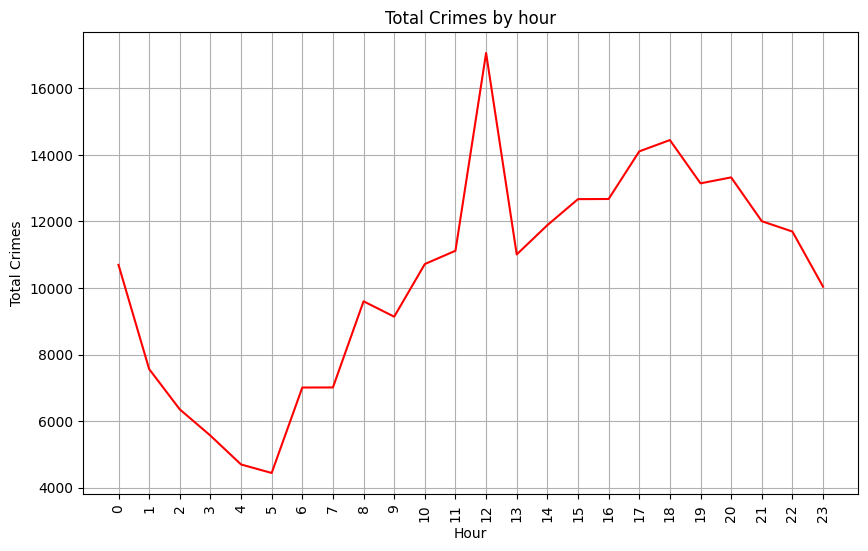

In [311]:
hours=[hour for hour,hour_crimes in lapd.groupby("hour_occ")]
plt.figure(figsize=(10,6))
sns.lineplot(x="hour_occ",y="total",data=hour_crimes,color="red")
plt.xlabel("Hour")
plt.ylabel("Total Crimes")
plt.title("Total Crimes by hour")
plt.xticks(hours,rotation=90)
plt.grid()
plt.show()

#### 3.2 Which area has the largest frequency of night crimes (crimes committed between 10 pm and 3:59 am)?

In [312]:
lapd.head(5)

,dr_no,date_rptd,date_occ,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
0,221412410,2022-06-15,2020-11-12,1700,17,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,11,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,16,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,12,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,6,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [313]:
filter=lapd.hour_occ.isin([22,23,0,1,2,3])
night_time=lapd.loc[filter]
night_time

,dr_no,date_rptd,date_occ,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
9,231207476,2023-02-27,2020-08-15,0001,0,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
12,221711184,2022-06-15,2020-05-15,0155,1,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV
36,221314362,2022-07-11,2020-04-07,0001,0,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL
39,231307252,2023-03-03,2020-07-05,2305,23,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY
42,221614254,2022-11-13,2020-01-01,0001,0,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247964,231212224,2023-05-17,2023-05-17,2300,23,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST
247970,231300825,2023-06-07,2023-06-07,2203,22,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
247971,230908346,2023-04-19,2023-04-18,2243,22,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV
247972,230406516,2023-03-19,2023-03-19,0122,1,Hollenbeck,VEHICLE - STOLEN,0,NaN,NaN,NaN,Invest Cont,3200 GARNET ST


In [314]:
peak_night_crime=night_time.groupby(["area_name"],as_index=False).hour_occ.count().sort_values("hour_occ",ascending=False).rename(columns=({"hour_occ":"total"}))
peak_night_crime

,area_name,total
1,Central,4091
0,77th Street,3362
6,Hollywood,3299
9,Newton,2927
14,Southeast,2884
11,Olympic,2851
15,Southwest,2787
12,Pacific,2773
8,N Hollywood,2597
13,Rampart,2480


In [315]:
print(f"The area with the largest volume of night crime is Central with {peak_night_crime.total.max()} crimes")

The area with the largest volume of night crime is Central with 4091 crimes


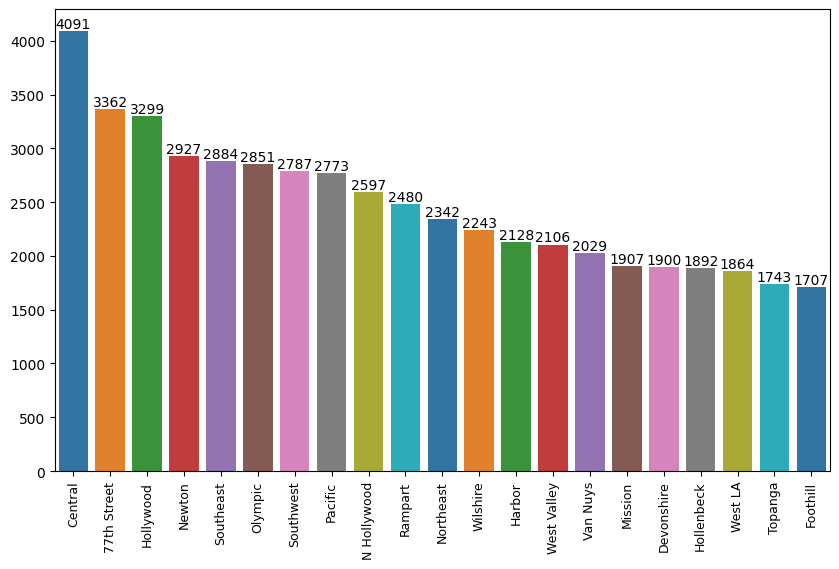

In [316]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="area_name",y="total",data=peak_night_crime,hue="area_name",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("")
plt.xlabel("",fontsize=12)
plt.ylabel("",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 3.3 Identify the number of crimes committed against victims by age group 
- (<18, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)

In [317]:
lapd.head(5)

,dr_no,date_rptd,date_occ,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location
0,221412410,2022-06-15,2020-11-12,1700,17,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,11,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,16,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,12,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,6,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [318]:
# age bins <18, 18-25, 26-34, 35-44, 45-54, 55-64, 65+

age_bins=[0,17,25,34,44,54,64,np.inf]
age_labels=["<18", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [319]:
lapd["age_bracket"]=pd.cut(lapd["vict_age"],bins=age_bins,labels=age_labels)
lapd.head()

,dr_no,date_rptd,date_occ,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,age_bracket
0,221412410,2022-06-15,2020-11-12,1700,17,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,NaN
1,220314085,2022-07-22,2020-05-12,1110,11,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,26-34
2,222013040,2022-08-06,2020-06-04,1620,16,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,55-64
3,220614831,2022-08-18,2020-08-17,1200,12,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,26-34
4,231207725,2023-02-27,2020-01-27,0635,6,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,35-44


In [320]:
victim_ages=pd.DataFrame(lapd["age_bracket"].value_counts()).rename(columns=({"count":"total"})).reset_index()
victim_ages

,age_bracket,total
0,26-34,47470
1,35-44,42157
2,45-54,28353
3,18-25,28291
4,55-64,20169
5,65+,14747
6,<18,4528


#### 3.4 List the crime with most impact

In [321]:
pd.DataFrame(lapd["crm_cd_desc"].value_counts().head(20)).rename(columns={"count":"total"}).reset_index()

,crm_cd_desc,total
0,VEHICLE - STOLEN,25797
1,THEFT OF IDENTITY,23017
2,BATTERY - SIMPLE ASSAULT,19970
3,BURGLARY,15163
4,BURGLARY FROM VEHICLE,14280
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14025
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13738
7,THEFT PLAIN - PETTY ($950 & UNDER),12107
8,INTIMATE PARTNER - SIMPLE ASSAULT,12101
9,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,12002


##### Stolen vehicles,theft of identity and battery-simple assault are the mosto common crimes in LA  

#### 3.5 List the crimes by year

In [323]:
lapd.insert(3,"year","")
lapd.sample()

,dr_no,date_rptd,date_occ,year,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,age_bracket
154630,231010794,2023-06-27,2023-06-27,,2045,20,West Valley,INTIMATE PARTNER - SIMPLE ASSAULT,25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,18200 JOVAN ST,18-25


In [325]:
lapd["year"]=pd.to_datetime(lapd["date_occ"]).dt.year
lapd.sample()

,dr_no,date_rptd,date_occ,year,time_occ,hour_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,age_bracket
164695,231212242,2023-05-17,2023-05-16,2023,1600,16,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),43,F,B,NaN,Invest Cont,7600 S HARVARD BL,35-44


In [337]:
year_crimes=lapd.groupby(["year"],as_index=False).dr_no.count().rename(columns=({"dr_no":"total"}))
year_crimes

,year,total
0,2020,757
1,2021,1362
2,2022,137973
3,2023,107896


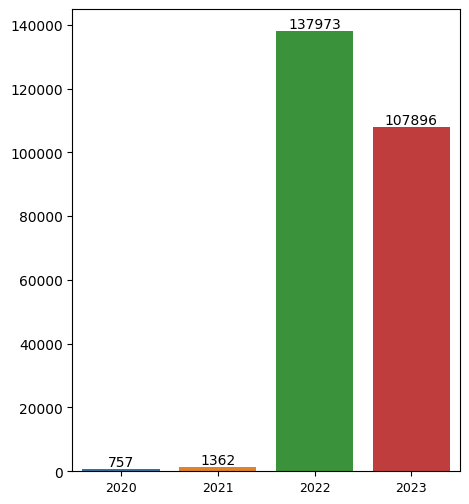

In [341]:
plt.figure(figsize=(5,6))
ax=sns.barplot(x="year",y="total",data=year_crimes,hue="year",palette="tab10",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("")
plt.xlabel("",fontsize=12)
plt.ylabel("",fontsize=12)
plt.xticks(size=9)
plt.show()